In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
superdata = pd.read_csv('covid19_superdata.csv')

In [3]:
df = pd.concat([superdata.iloc[:, 0:4],superdata.iloc[:,865:1079], 
                superdata.iloc[:,1976:2190],
               superdata.iloc[:, -1]], axis=1)

In [4]:
df.head()

,countyFIPS,County Name,State,StateFIPS,2022-06-01_x,2022-06-02_x,2022-06-03_x,2022-06-04_x,2022-06-05_x,2022-06-06_x,...,2022-12-23_y,2022-12-24_y,2022-12-25_y,2022-12-26_y,2022-12-27_y,2022-12-28_y,2022-12-29_y,2022-12-30_y,2022-12-31_y,population
0,0,statewide unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,autauga county,AL,1,15969,15978,15978,15978,15978,16032,...,230,230,230,230,230,230,230,230,230,55869
2,1003,baldwin county,AL,1,56580,56648,56648,56648,56648,56895,...,719,719,719,719,719,719,719,719,719,223234
3,1005,barbour county,AL,1,5710,5714,5714,5714,5714,5719,...,103,103,103,103,103,103,103,103,103,24686
4,1007,bibb county,AL,1,6508,6512,6512,6512,6512,6534,...,108,108,108,108,108,108,108,108,108,22394


In [5]:
def county_state(x):
    return x[0] +"_"+ x[1]

In [6]:
df["county_state"] = df[["County Name", "State"]].apply(county_state, axis=1)

In [7]:
df.index=df["county_state"]

In [8]:
df.head()

,countyFIPS,County Name,State,StateFIPS,2022-06-01_x,2022-06-02_x,2022-06-03_x,2022-06-04_x,2022-06-05_x,2022-06-06_x,...,2022-12-24_y,2022-12-25_y,2022-12-26_y,2022-12-27_y,2022-12-28_y,2022-12-29_y,2022-12-30_y,2022-12-31_y,population,county_state
county_state,,,,,,,,,,,,,,,,,,,,,
statewide unallocated_AL,0,statewide unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,statewide unallocated_AL
autauga county_AL,1001,autauga county,AL,1,15969,15978,15978,15978,15978,16032,...,230,230,230,230,230,230,230,230,55869,autauga county_AL
baldwin county_AL,1003,baldwin county,AL,1,56580,56648,56648,56648,56648,56895,...,719,719,719,719,719,719,719,719,223234,baldwin county_AL
barbour county_AL,1005,barbour county,AL,1,5710,5714,5714,5714,5714,5719,...,103,103,103,103,103,103,103,103,24686,barbour county_AL
bibb county_AL,1007,bibb county,AL,1,6508,6512,6512,6512,6512,6534,...,108,108,108,108,108,108,108,108,22394,bibb county_AL


In [9]:
superdataT = df.T.copy()

In [10]:
superdataT["Date"] = superdataT.index

In [11]:
to_remove = list(superdataT.index[:4])
to_remove.append(superdataT.index[-2])
to_remove.append(superdataT.index[-1])
to_remove

['countyFIPS',
 'County Name',
 'State',
 'StateFIPS',
 'population',
 'county_state']

In [12]:
def new_death(x):
    if x[-2:]=="_x":
        return "new"
    elif x[-2:]=="_y":
        return "death"

In [13]:
superdataT["new_death"]=superdataT["Date"].apply(new_death)

In [14]:
superdataT["new_death"].value_counts().index

Index(['new', 'death'], dtype='object')

In [15]:
def clean_date(x,l=to_remove):
        if x in l:
            return np.nan
        else: 
            return x[:-2]

In [16]:
superdataT["Date"] = superdataT["Date"].apply(clean_date,l=to_remove)

In [17]:
superdataT.head()

county_state,statewide unallocated_AL,autauga county_AL,baldwin county_AL,barbour county_AL,bibb county_AL,blount county_AL,bullock county_AL,butler county_AL,calhoun county_AL,chambers county_AL,...,platte county_WY,sheridan county_WY,sublette county_WY,sweetwater county_WY,teton county_WY,uinta county_WY,washakie county_WY,weston county_WY,Date,new_death
countyFIPS,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56031,56033,56035,56037,56039,56041,56043,56045,NaN,None
County Name,statewide unallocated,autauga county,baldwin county,barbour county,bibb county,blount county,bullock county,butler county,calhoun county,chambers county,...,platte county,sheridan county,sublette county,sweetwater county,teton county,uinta county,washakie county,weston county,NaN,None
State,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,NaN,None
StateFIPS,1,1,1,1,1,1,1,1,1,1,...,56,56,56,56,56,56,56,56,NaN,None
2022-06-01_x,0,15969,56580,5710,6508,15077,2337,5091,32596,8551,...,1929,8150,1936,11178,10229,5681,2369,1594,2022-06-01,new


In [18]:
superdataT["Week"]=pd.DatetimeIndex(superdataT["Date"]).week

C:\Users\amyme\AppData\Local\Temp\ipykernel_14660\801288638.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  superdataT["Week"]=pd.DatetimeIndex(superdataT["Date"]).week


In [19]:
superdataT["Date"]=pd.DatetimeIndex(superdataT["Date"])

In [20]:
superdataT=superdataT[superdataT["Date"].notnull()]

In [21]:
superdataT.index = superdataT["Date"]

In [22]:
superdataT["Total"]=superdataT.iloc[:,:-3].sum(axis=1)

In [23]:
for feat in superdataT.columns[:-4]:
    superdataT[feat]=superdataT[feat].astype("int")

In [24]:
superdataT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 428 entries, 2022-06-01 to 2022-12-31
Columns: 3193 entries, statewide unallocated_AL to Total
dtypes: datetime64[ns](1), float64(2), int32(3189), object(1)
memory usage: 5.2+ MB


In [25]:
superdataT["Total"]=superdataT.iloc[:,:-4].sum(axis=1)

In [26]:
superdataT.reset_index(drop=True,inplace=True)

In [27]:
superdataT["new_death"]=="death"

0      False
1      False
2      False
3      False
4      False
       ...  
423     True
424     True
425     True
426     True
427     True
Name: new_death, Length: 428, dtype: bool

In [28]:
col_NC=pd.Series(superdataT.columns)[pd.Series(superdataT.columns).str.contains("_NC")][1:]
col_NC

1920     alamance county_NC
1921    alexander county_NC
1922    alleghany county_NC
1923        anson county_NC
1924         ashe county_NC
               ...         
2015        wayne county_NC
2016       wilkes county_NC
2017       wilson county_NC
2018       yadkin county_NC
2019       yancey county_NC
Name: county_state, Length: 100, dtype: object

In [29]:
df_NC = superdataT[col_NC].copy()

In [30]:
df_NC.head()

county_state,alamance county_NC,alexander county_NC,alleghany county_NC,anson county_NC,ashe county_NC,avery county_NC,beaufort county_NC,bertie county_NC,bladen county_NC,brunswick county_NC,...,vance county_NC,wake county_NC,warren county_NC,washington county_NC,watauga county_NC,wayne county_NC,wilkes county_NC,wilson county_NC,yadkin county_NC,yancey county_NC
0,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,12222,317226,4502,3091,13215,32084,17994,22266,11315,5574
1,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,12222,317226,4502,3091,13215,32084,17994,22266,11315,5574
2,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,12222,317226,4502,3091,13215,32084,17994,22266,11315,5574
3,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,12222,317226,4502,3091,13215,32084,17994,22266,11315,5574
4,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,12222,317226,4502,3091,13215,32084,17994,22266,11315,5574


In [31]:
df_NC["Total_NC"]=df_NC.sum(axis=1)
df_NC["new_death"]=superdataT["new_death"]
df_NC["Week"]=superdataT["Week"]

In [32]:
df_NC.head()

county_state,alamance county_NC,alexander county_NC,alleghany county_NC,anson county_NC,ashe county_NC,avery county_NC,beaufort county_NC,bertie county_NC,bladen county_NC,brunswick county_NC,...,washington county_NC,watauga county_NC,wayne county_NC,wilkes county_NC,wilson county_NC,yadkin county_NC,yancey county_NC,Total_NC,new_death,Week
0,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
1,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
2,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
3,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
4,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0


In [33]:
#df_NC.index[]

In [34]:
#(df["population"][pd.Series(df.columns).str.contains("_NC")])

### Normalizing NC Data

In [35]:
nc_pop=superdata[superdata.StateFIPS==37].iloc[:,-1:].sum()

In [36]:
nc_pop.head()

population    10488084
dtype: int64

In [37]:
df_NC.columns

Index(['alamance county_NC', 'alexander county_NC', 'alleghany county_NC',
       'anson county_NC', 'ashe county_NC', 'avery county_NC',
       'beaufort county_NC', 'bertie county_NC', 'bladen county_NC',
       'brunswick county_NC',
       ...
       'washington county_NC', 'watauga county_NC', 'wayne county_NC',
       'wilkes county_NC', 'wilson county_NC', 'yadkin county_NC',
       'yancey county_NC', 'Total_NC', 'new_death', 'Week'],
      dtype='object', name='county_state', length=103)

In [38]:
df_NC.index[:4]

RangeIndex(start=0, stop=4, step=1)

In [39]:
df_NC.iloc[:,2:5]

county_state,alleghany county_NC,anson county_NC,ashe county_NC
0,3041,6672,6575
1,3041,6672,6575
2,3041,6672,6575
3,3041,6672,6575
4,3041,6672,6575
...,...,...,...
423,19,109,91
424,19,109,91
425,19,109,91
426,19,109,91


In [40]:
df_NC.columns

Index(['alamance county_NC', 'alexander county_NC', 'alleghany county_NC',
       'anson county_NC', 'ashe county_NC', 'avery county_NC',
       'beaufort county_NC', 'bertie county_NC', 'bladen county_NC',
       'brunswick county_NC',
       ...
       'washington county_NC', 'watauga county_NC', 'wayne county_NC',
       'wilkes county_NC', 'wilson county_NC', 'yadkin county_NC',
       'yancey county_NC', 'Total_NC', 'new_death', 'Week'],
      dtype='object', name='county_state', length=103)

In [41]:
df_NC.iloc[0,99:103]

county_state
yancey county_NC       5574
Total_NC            2772725
new_death               new
Week                   22.0
Name: 0, dtype: object

In [42]:
X_data = df_NC[['alamance county_NC', 'alexander county_NC', 'alleghany county_NC','anson county_NC', 'ashe county_NC', 'avery county_NC','beaufort county_NC', 'bertie county_NC', 'bladen county_NC','brunswick county_NC', 'buncombe county_NC', 'burke county_NC','cabarrus county_NC','caldwell county_NC','camden county_NC','carteret county_NC','caswell county_NC','catawba county_NC','chatham county_NC','cherokee county_NC','chowan county_NC','clay county_NC','cleveland county_NC','columbus county_NC','currituck county_NC','dare county_NC','davidson county_NC','davie county_NC','duplin county_NC','durham county_NC','edgecombe county_NC','forsyth county_NC','franklin county_NC','gaston county_NC','gates county_NC','graham county_NC','granville county_NC','greene county_NC','guilford county_NC','halifax county_NC','harnett county_NC','haywood county_NC','henderson county_NC','hertford county_NC','hoke county_NC','hyde county_NC','iredell county_NC','jackson county_NC','johnston county_NC','jones county_NC','lee county_NC','lenoir county_NC','lincoln county_NC','mcdowell county_NC','macon county_NC','madison county_NC','martin county_NC','mecklenburg county_NC','mitchell county_NC','montgomery county_NC','moore county_NC','nash county_NC','new hanover county_NC','northampton county_NC','onslow county_NC','orange county_NC','pamlico county_NC','pasquotank county_NC','pender county_NC','pitt county_NC','polk county_NC','randolph county_NC','richmond county_NC','robeson county_NC','rockingham county_NC','rowan county_NC','rutherford county_NC','sampson county_NC','scotland county_NC','stanly county_NC','stokes county_NC','surry county_NC','swain county_NC','transylvania county_NC','tyrrell county_NC','union county_NC','vance county_NC','wake county_NC','warren county_NC','washington county_NC','watauga county_NC','wayne county_NC','wilkes county_NC','wilson county_NC','yadkin county_NC','yancey county_NC','Total_NC']]
Y_data = nc_pop

In [43]:
X_data.head()

county_state,alamance county_NC,alexander county_NC,alleghany county_NC,anson county_NC,ashe county_NC,avery county_NC,beaufort county_NC,bertie county_NC,bladen county_NC,brunswick county_NC,...,wake county_NC,warren county_NC,washington county_NC,watauga county_NC,wayne county_NC,wilkes county_NC,wilson county_NC,yadkin county_NC,yancey county_NC,Total_NC
0,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,317226,4502,3091,13215,32084,17994,22266,11315,5574,2772725
1,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,317226,4502,3091,13215,32084,17994,22266,11315,5574,2772725
2,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,317226,4502,3091,13215,32084,17994,22266,11315,5574,2772725
3,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,317226,4502,3091,13215,32084,17994,22266,11315,5574,2772725
4,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,317226,4502,3091,13215,32084,17994,22266,11315,5574,2772725


In [44]:
#X_data.apply(lambda x: (x-x.min(axis=1))/(x.max(axis=1)-x.min(axis=1))

#### Using Sklearn to normalize https://www.youtube.com/watch?v=Fw5iiyIHzew

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scalar = MinMaxScaler()
scalar.fit(X_data)
NC_Data = scalar.transform(X_data)

In [47]:
NC_Data

array([[8.35033693e-01, 8.58092035e-01, 8.49241999e-01, ...,
        7.88698654e-01, 8.95762299e-01, 8.34731959e-01],
       [8.35033693e-01, 8.58092035e-01, 8.49241999e-01, ...,
        7.88698654e-01, 8.95762299e-01, 8.34731959e-01],
       [8.35033693e-01, 8.58092035e-01, 8.49241999e-01, ...,
        7.88698654e-01, 8.95762299e-01, 8.34731959e-01],
       ...,
       [1.02878894e-03, 1.31244361e-03, 8.42223470e-04, ...,
        1.40914535e-03, 1.94836824e-03, 9.03965511e-04],
       [1.02878894e-03, 1.31244361e-03, 8.42223470e-04, ...,
        1.40914535e-03, 1.94836824e-03, 9.03965511e-04],
       [1.02878894e-03, 1.31244361e-03, 8.42223470e-04, ...,
        1.40914535e-03, 1.94836824e-03, 9.03965511e-04]])

In [48]:
#sns.histplot(data=df_NC[df_NC["new_death"]=="new"], x=NC_Data, kde=True)

### NC Data KDE

#### Plotting Distribution

<AxesSubplot:xlabel='Total_NC', ylabel='Count'>

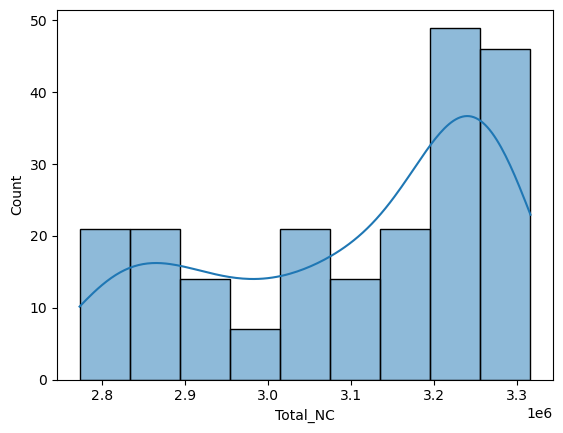

In [49]:
sns.histplot(data=df_NC[df_NC["new_death"]=="new"],x="Total_NC", kde = True)

<AxesSubplot:xlabel='Total_NC', ylabel='Density'>

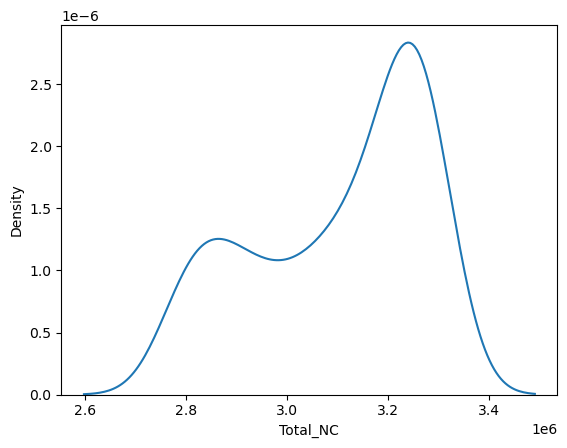

In [50]:
sns.kdeplot(data=df_NC[df_NC["new_death"]=="new"],x="Total_NC")

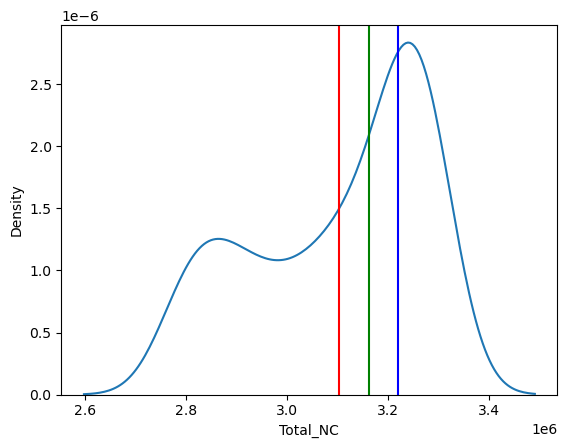

In [51]:
sns.kdeplot(data=df_NC[df_NC["new_death"]=="new"],x="Total_NC")
plt.axvline(df_NC[df_NC["new_death"]=="new"]["Total_NC"].mean(), color = "red")
plt.axvline(df_NC[df_NC["new_death"]=="new"]["Total_NC"].median(), color = "green")
plt.axvline(df_NC[df_NC["new_death"]=="new"]["Total_NC"].mode()[0], color = "blue")

In [52]:
df_NC[df_NC["new_death"]=="new"]["Total_NC"].mean()

3103816.0841121497

In [53]:
ncvar=np.var(df_NC[df_NC["new_death"]=="new"]["Total_NC"])
print("Variance of new death cases in NC:", ncvar)

Variance of new death cases in NC: 28698153394.21727


###### This is a bimodal distribution because it has two peaks. It is skewed to the left. The center is accounted for through the mean, median and mode which is found around 3103816. 

## Comparing it to VA, GA, SC

#### VA

In [70]:
col_VA=pd.Series(superdataT.columns)[pd.Series(superdataT.columns).str.contains("_VA")][1:]
col_VA

2863        accomack county_VA
2864       albemarle county_VA
2865       alleghany county_VA
2866          amelia county_VA
2867         amherst county_VA
                 ...          
2991           suffolk city_VA
2992    virginia beach city_VA
2993        waynesboro city_VA
2994      williamsburg city_VA
2995        winchester city_VA
Name: county_state, Length: 133, dtype: object

In [71]:
df_VA = superdataT[col_VA].copy()
df_VA["Total_VA"]=df_VA.sum(axis=1)
df_VA["new_death"]=superdataT["new_death"]
df_VA["Week"]=superdataT["Week"]

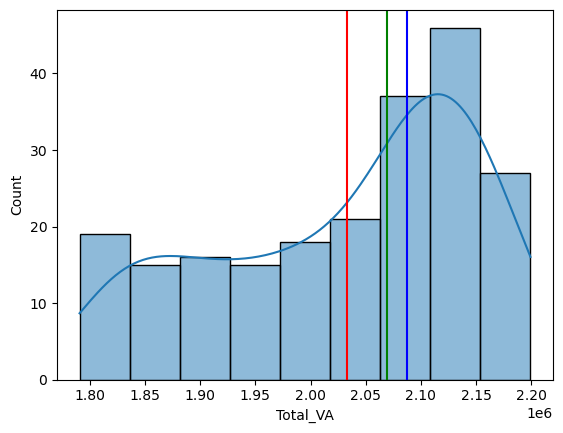

In [89]:
sns.histplot(data=df_VA[df_VA["new_death"]=="new"],x="Total_VA", kde = True)
plt.axvline(df_VA[df_VA["new_death"]=="new"]["Total_VA"].mean(), color = "red")
plt.axvline(df_VA[df_VA["new_death"]=="new"]["Total_VA"].median(), color = "green")
plt.axvline(df_VA[df_VA["new_death"]=="new"]["Total_VA"].mode()[0], color = "blue")

In [90]:
df_VA[df_VA["new_death"]=="new"]["Total_VA"].mean()

2032707.1074766356

### GA

In [73]:
col_GA=pd.Series(superdataT.columns)[pd.Series(superdataT.columns).str.contains("_GA")][1:]
col_GA

395      appling county_GA
396     atkinson county_GA
397        bacon county_GA
398        baker county_GA
399      baldwin county_GA
              ...         
549    whitfield county_GA
550       wilcox county_GA
551       wilkes county_GA
552    wilkinson county_GA
553        worth county_GA
Name: county_state, Length: 159, dtype: object

In [78]:
df_GA = superdataT[col_GA].copy()
df_GA["Total_GA"]=df_GA.sum(axis=1)
df_GA["Week"]=superdataT["Week"]
df_GA["new_death"]=superdataT["new_death"]

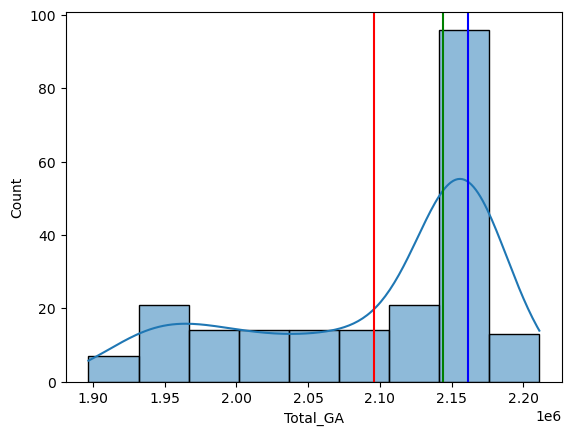

In [91]:
sns.histplot(data=df_GA[df_GA["new_death"]=="new"],x="Total_GA", kde = True)
plt.axvline(df_GA[df_GA["new_death"]=="new"]["Total_GA"].mean(), color = "red")
plt.axvline(df_GA[df_GA["new_death"]=="new"]["Total_GA"].median(), color = "green")
plt.axvline(df_GA[df_GA["new_death"]=="new"]["Total_GA"].mode()[0], color = "blue")

In [92]:
df_GA[df_GA["new_death"]=="new"]["Total_GA"].mean()

2096101.238317757

### TN

In [84]:
col_TN=pd.Series(superdataT.columns)[pd.Series(superdataT.columns).str.contains("_TN")][1:]
col_TN

2467      anderson county_TN
2468       bedford county_TN
2469        benton county_TN
2470       bledsoe county_TN
2471        blount county_TN
                ...         
2557         wayne county_TN
2558       weakley county_TN
2559         white county_TN
2560    williamson county_TN
2561        wilson county_TN
Name: county_state, Length: 95, dtype: object

In [85]:
df_TN=superdataT[col_TN].copy()
df_TN["Total_TN"]=df_sc.sum(axis=1)
df_TN["new_death"]=superdataT["new_death"]
df_TN["Week"]=superdataT["Week"]

C:\Users\amyme\AppData\Local\Temp\ipykernel_14660\3633611855.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_TN["Total_TN"]=df_sc.sum(axis=1)


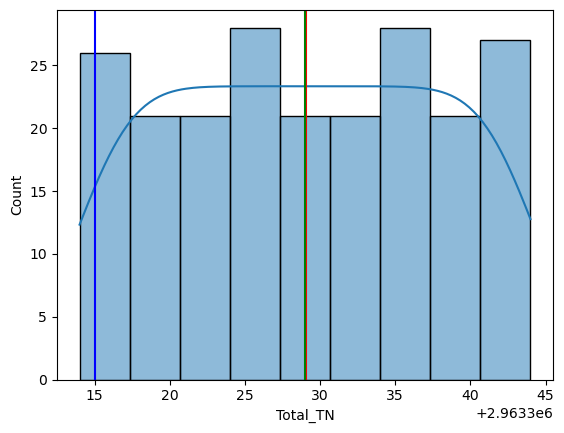

In [93]:
sns.histplot(data=df_TN[df_TN["new_death"]=="new"],x="Total_TN", kde = True)
plt.axvline(df_TN[df_TN["new_death"]=="new"]["Total_TN"].mean(), color = "red")
plt.axvline(df_TN[df_TN["new_death"]=="new"]["Total_TN"].median(), color = "green")
plt.axvline(df_TN[df_TN["new_death"]=="new"]["Total_TN"].mode()[0], color = "blue")

In [94]:
df_TN[df_TN["new_death"]=="new"]["Total_TN"].mean()

2963329.070093458

In [104]:
norm_VA = (df_VA[df_VA["new_death"]=="new"]["Total_VA"].mean())/(superdata[superdata.StateFIPS==51].iloc[:,-1:].sum())
print(norm_VA)

population    0.238147
dtype: float64


In [105]:
norm_GA = (df_GA[df_GA["new_death"]=="new"]["Total_GA"].mean())/(superdata[superdata.StateFIPS==13].iloc[:,-1:].sum())
print(norm_GA)

population    0.197421
dtype: float64


In [106]:
norm_TN = (df_TN[df_TN["new_death"]=="new"]["Total_TN"].mean())/(superdata[superdata.StateFIPS==47].iloc[:,-1:].sum())
print(norm_TN)

population    0.433922
dtype: float64


### With the normalized mean values of Virgina having a mean of .238, Georgia having a mean of .197, and Tennesse a mean of .434 we can observe that Georgia had the most pragmatic approach to covid since it had a lower case mean. Tennesse had high cases for a prolonged period of time, as opposed to Georgia, North Carolina and Virgina that had two high points around the holidays and school beginnings which made the distributions bimodal. 

In [54]:
df2 = pd.read_csv("EconomicCharac.csv")

C:\Users\amyme\AppData\Local\Temp\ipykernel_14660\2641987803.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,98,99,100,101,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,286,287,288,289,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,358,359,360,361,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,

In [55]:
df2.columns=df2.iloc[0]

In [95]:
df2.head()

,Geography,Geographic Area Name,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Annotation of Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over,Annotation of Estimate!!EMPLOYMENT STATUS!!Population 16 years and over,Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Annotation of Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,Annotation of Margin of Error!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force,...,Annotation of Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!18 years and over!!65 years and over,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Annotation of Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Annotation of Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!People in families,Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Annotation of Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,Annotation of Percent Margin of Error!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!All people!!Unrelated individuals 15 years and over,NaN
Geographic Area Name,,,,,,,,,,,,,,,,,,,,,
"Alamance County, North Carolina",0500000US37001,"Alamance County, North Carolina",139425,705,NaN,NaN,86242,NaN,2629,NaN,...,NaN,8.9,2.9,NaN,NaN,21.7,NaN,4.8,NaN,NaN
"Brunswick County, North Carolina",0500000US37019,"Brunswick County, North Carolina",126504,672,NaN,NaN,62863,NaN,2581,NaN,...,NaN,5.6,2.2,NaN,NaN,21.2,NaN,5.2,NaN,NaN
"Buncombe County, North Carolina",0500000US37021,"Buncombe County, North Carolina",229261,1380,NaN,NaN,135237,NaN,4319,NaN,...,NaN,7.0,2.2,NaN,NaN,22.1,NaN,3.8,NaN,NaN
"Burke County, North Carolina",0500000US37023,"Burke County, North Carolina",73862,543,NaN,NaN,42388,NaN,2175,NaN,...,NaN,10.1,4.1,NaN,NaN,30.1,NaN,7.6,NaN,NaN
"Cabarrus County, North Carolina",0500000US37025,"Cabarrus County, North Carolina",180305,1252,NaN,NaN,123309,NaN,3522,NaN,...,NaN,8.2,2.7,NaN,NaN,23.9,NaN,6.6,NaN,NaN


In [56]:
df2["Geographic Area Name"].str.contains("North Carolina")

0      False
1      False
2      False
3      False
4      False
       ...  
837    False
838    False
839    False
840    False
841    False
Name: Geographic Area Name, Length: 842, dtype: bool

In [57]:
df2 = df2[df2["Geographic Area Name"].str.contains("North Carolina")].copy()

In [58]:
df2.index=df2["Geographic Area Name"]

In [60]:
df_NC.head

county_state,alamance county_NC,alexander county_NC,alleghany county_NC,anson county_NC,ashe county_NC,avery county_NC,beaufort county_NC,bertie county_NC,bladen county_NC,brunswick county_NC,...,washington county_NC,watauga county_NC,wayne county_NC,wilkes county_NC,wilson county_NC,yadkin county_NC,yancey county_NC,Total_NC,new_death,Week
0,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
1,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
2,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
3,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0
4,49188,10600,3041,6672,6575,4697,12939,4353,9608,31630,...,3091,13215,32084,17994,22266,11315,5574,2772725,new,22.0


In [61]:
econNC = df2["Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force"].astype("int64").copy()

In [62]:
print(econNC)

Geographic Area Name
Alamance County, North Carolina        86112
Brunswick County, North Carolina       62820
Buncombe County, North Carolina       134702
Burke County, North Carolina           42388
Cabarrus County, North Carolina       122871
Caldwell County, North Carolina        38533
Carteret County, North Carolina        31492
Catawba County, North Carolina         78052
Chatham County, North Carolina         34504
Cleveland County, North Carolina       47592
Craven County, North Carolina          42567
Cumberland County, North Carolina     137715
Davidson County, North Carolina        77003
Durham County, North Carolina         175578
Forsyth County, North Carolina        190093
Franklin County, North Carolina        35291
Gaston County, North Carolina         114709
Guilford County, North Carolina       281445
Harnett County, North Carolina         56295
Henderson County, North Carolina       54298
Iredell County, North Carolina         99722
Johnston County, North Carolina   

In [63]:
econNC.info()

<class 'pandas.core.series.Series'>
Index: 40 entries, Alamance County, North Carolina to Wilson County, North Carolina
Series name: Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force
Non-Null Count  Dtype
--------------  -----
40 non-null     int64
dtypes: int64(1)
memory usage: 640.0+ bytes


In [64]:
len(econNC)

40

###### I see that the arrays have to be the same size but I'm not sure how to make them the same size here

In [88]:
x1 = NC_Data
y1 = econNC
corr_matrix = np.corrcoef(x1,y1)
corr_coef = corr_matrix[0,1]
print("Correlation coeeficient: ", corr_coef)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 97 and the array at index 1 has size 40

##### It would only work if my other array also had 40 entries

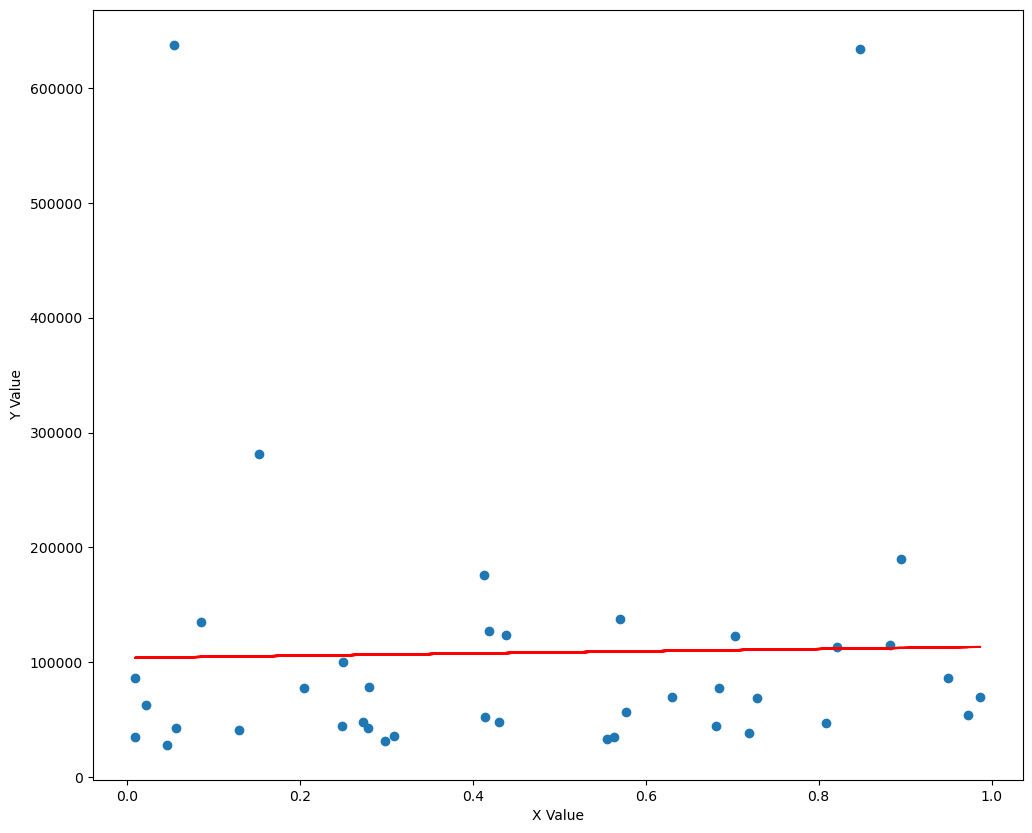

Correlation of X and Y: 0.02


In [66]:
X =np.random.rand(40)
Y = X + econNC

m, b = np.polyfit(X, Y, 1)

plt.figure(figsize=(12,10))
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.plot(X, m*X + b, 'r-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

#### Here is another attempt at correlation:

In [96]:
corr = df_NC[df_NC["new_death"]=="new"]["Total_NC"].corr(df2["Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force"])
print(corr)

nan


#### However, there are no null values in the data

In [97]:
df2["Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force"].isnull().sum()

0

#### This is another try at correlation:

In [99]:
dfint = df2["Estimate!!EMPLOYMENT STATUS!!Population 16 years and over!!In labor force!!Civilian labor force"].astype("int64").copy()

In [100]:
NCcorr = df_NC[df_NC["new_death"]=="new"]["Total_NC"].corr(dfint)

In [101]:
print(NCcorr)

nan


### Hypothesis:

#### Is employment status negatively correlated to higher covid cases in North Carolina?
##### Does the PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL increase as cases rise?
#### Does unemployment rate positively correlated to higher covid cases?